In [159]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# print plt.style.available
# plt.style.use('seaborn-pastel')
plt.style.use('ggplot')

## Cost function

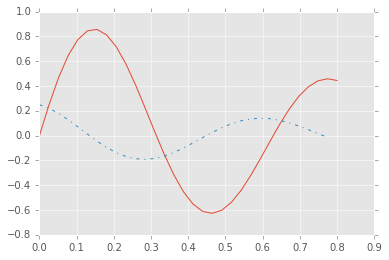

In [160]:
t_end = 0.8#s
Fs = 40
theta = np.linspace(0, t_end, t_end*Fs)

def cost(theta):
    # theta value or vector
    theta = np.array(theta)
    hz = 10
    return np.sin(hz*theta)*np.exp(-theta)

c = cost(theta)
plt.plot(theta,c,lw=1)

grad = np.diff(c)
plt.plot(theta[:-1], grad,'-.')

## Gradient Descent

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


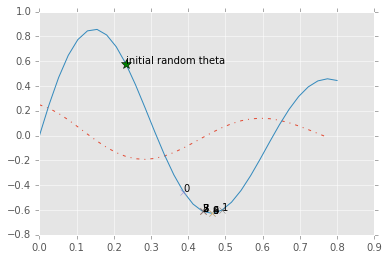

In [161]:
def gradient_descent(cost, x, learning_rate, Fs, iterations):
    # start at random location in the sample space
    theta_i = np.random.randint(len(x)*0.1,len(x)*0.9)
    grad = np.diff(cost(x))
    plt.plot(x[theta_i], cost(x)[theta_i],'g*',ms=10)
    plt.annotate('initial random theta',xy=([x[theta_i],cost(x)[theta_i]]))
    for i in range(iterations):
        theta_i -= learning_rate * grad[theta_i]
        plt.plot(x[theta_i],cost(x[theta_i]),'-x')
        plt.annotate(i,xy=([x[theta_i],cost(x)[theta_i]]))
#         print cost(x[theta_i])
#         plt.plot(x[theta_i],cost[theta_i])

plt.plot(theta[:-1], grad,'-.')
plt.plot(theta,c,lw=1)
gradient_descent(cost, theta,Fs, 0.8, 10)

## Cost function in 3D

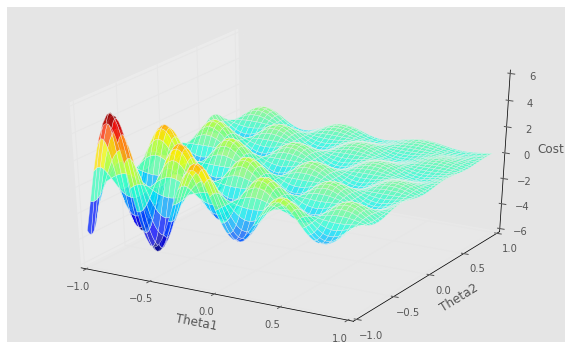

In [158]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
hz = 10
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Cost')